In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.integrate import solve_ivp


# Cinética de Procesos (Sesión 03)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 3.2 Dimensionamiento de Reactores ideales

**Consideraciones generales:**

Para el dimensionamiento de un reactor, en su forma más elemental, se deben de tener en cuenta las siguientes consideraciones:

- Existe una dependencia funcional entre la velocidad de reacción $r_{\mathrm{A}}$, y la conversión $X$, i.e. para un valor de $X$ existirá un solo valor de $r_{\mathrm{A}}$.

- La dependencia entre $r_{\mathrm{A}}$ y $X$ puede determinarse de forma empírica, o mediante una función que relacione la que la ley de velocidad de reacción y la conversión, $r_{\mathrm{A}} = r_{\mathrm{A}}(X)$. 

### 3.2.1 Dimensionamiento de reactores discontinuous (BR)

Para el reactor discontinuo, se considera la hipótesis de mezclado perfecto en el reactor, i.e., no existen gradientes de composición, temperatura, velocidad de reacción, etc. en el reactor.

Para el caso ideal, el dimensionamiento de los reactores tipo batch está gobernado por el tamaño de lote que se desea producir. 

$$t = N_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}} V}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$N_{\mathrm{A_0}}$**: Cantidad inicial del reactivo limitante en el reactor, $[\mathrm{mol}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales:**

- Para casos de volumen constante, el término $V$ se puede sacar de la integral, y en estos casos el término fuera de la integral tendra unidades de concentración: $\frac{N_{\mathrm{A_0}}}{V}$ $[\mathrm{mol.m^{-3}}]$.

### 3.2.2 Dimensionamiento de reactores de flujo continuo (CSTR, PFR)

#### 3.2.2.1 Reactor continuo agitado

Para el reactor continuo agitado, se consideran las hipótesis de operación en régimen estacionario y de mezclado perfecto en el reactor, i.e., los flujos de entrada y salida son iguales, y no existen gradientes de composición, temperatura, velocidad de reacción, etc. en el reactor.

El volumen del reactor se calcula mediante la ecuación algebráica reproducida debajo:

$$V = \frac{F_{\mathrm{A}_0}}{-r_{\mathrm{A}}}X$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$F_{\mathrm{A_0}}$**: Flujo molar del reactivo limitante a la entrada del reactor, $[\mathrm{mol.s^{-1}}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales**:

- El término $F_{\mathrm{A_0}}$ se considera como constante (hipótesis de operación en régimen estacionario).

- Para un volumen de reactor dado, existiran únicamente un par de valores $[r_{\mathrm{A}}, X]$, que satisfagan la ecuación (hipótesis de reactor perfectamente agitado).

#### 3.2.2.2 Reactor de flujo pistón

Para el reactor de flujo pistón, se consideran las hipótesis de operación, i.e., los flujos de entrada y salida son iguales.

Por definición, pueden existir gradientes de composición, temperatura, velocidad de reacción, etc. sobre el volumen del reactor. Una hipótesis recurrente es considerar que solo existen gradientes sobre el eje axial del reactor.

El volumen del reactor se calcula mediante la ecuación integral reproducida debajo:

$$V = F_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$F_{\mathrm{A_0}}$**: Flujo molar del reactivo limitante a la entrada del reactor, $[\mathrm{mol.s^{-1}}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales**:

- El término $F_{\mathrm{A_0}}$ se considera como constante (hipótesis de operación en régimen estacionario).

- Para un volumen dado, existen gradientes de conversión dentro del reactor, por lo que se debe resolver la integral definida por algún método gráfico, analítico o numérico.

### 3.2.3 Gráfica de Levenspiel

En la ***Tabla 1*** se recapitulan las ecuaciones de diseño para los reactores de flujo continuo tipo CSTR y PFR, en términos de la conversión $X$.

<center>

***Tabla 1. Ecuaciones de diseño para reactores CSTR y PFR, en términos de la conversión*** 

| Reactor| Acrónimo | Ecuación de diseño | Esquema |
|---------|---------|--------------------|:-------:|
| Reactor continuo agitado | CSTR    | $$V = \frac{F_{\mathrm{A}_0}}{-r_{\mathrm{A}}}X$$ | <img src="figures/images/Continuous_bach_reactor_CSTR.svg" style="width:100px" title="Continuous Stirred Tank Reactor"> |
| Reactor de flujo pistón | PFR    | $$V = F_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$ | <img src="figures/images/ReactorPlugFlow.svg" style="width:200px" title="Plug Flow Reactor"> | 

</center>

 En las ecuaciones de diseño que se muestran arriba, el volumen del reactor es proporcional al flujo molar $F_{\mathrm{A}_0}$ y a la conversión $X$, e inversamente proporcional a la tasa de reacción $r_{\mathrm{A}}$. 

### 3.2.3 Ejemplos

Adaptado de: ***[Fogler, 2017, pp. 39-47]***

In [3]:
FA0 = 0.4 # [mol.s-1]

In [4]:
X = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
rA = -1. * np.array([0.45, 0.37, 0.30, 0.195, 0.113, 0.079, 0.05]) #[(mol.m-3).s-1]
rAinv = 1 / rA # [(m3.mol-1).s]
FA0_rA = FA0 / rA

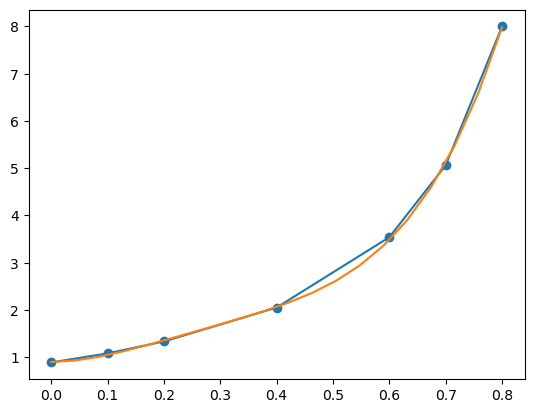

In [7]:
fig, ax = plt.subplots()
ax.plot(X, -FA0_rA, ls='-', marker='o')

# polynomial fitting
#fit = Polynomial.fit(X, -FA0_rA, deg=4)




x = np.linspace(0, 0.8, 20)
ax.plot(x, fit(x))

In [6]:
fit

Polynomial([2.06608725, 1.6546968 , 1.08947006, 1.88654508, 1.28571458], domain=[0. , 0.8], window=[-1.,  1.], symbol='x')

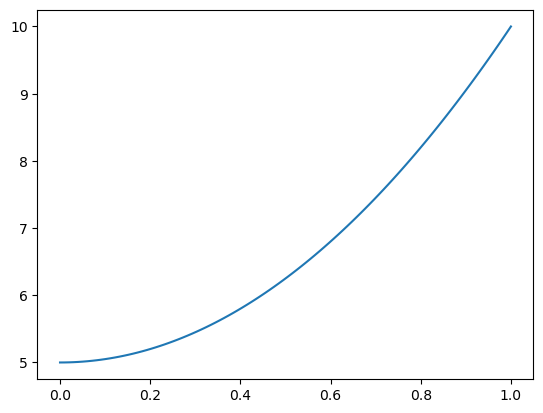

In [20]:
X = np.linspace(0, 1, 100)
rAinv =  5*X**2 + 5
rA = 1/rAinv
plt.plot(X, rAinv)

In [14]:
rA

array([0.2       , 0.1999796 , 0.19991841, 0.19981651, 0.19967403,
       0.19949115, 0.19926807, 0.19900508, 0.19870248, 0.19836066,
       0.19798   , 0.19756098, 0.19710407, 0.19660983, 0.19607882,
       0.19551167, 0.19490902, 0.19427156, 0.1936    , 0.1928951 ,
       0.19215763, 0.1913884 , 0.19058824, 0.18975799, 0.18889853,
       0.18801074, 0.18709554, 0.18615385, 0.18518658, 0.1841947 ,
       0.18317914, 0.18214087, 0.18108083, 0.18      , 0.17889933,
       0.17777979, 0.17664234, 0.17548791, 0.17431747, 0.17313196,
       0.17193229, 0.17071939, 0.16949416, 0.16825751, 0.16701031,
       0.16575342, 0.16448771, 0.16321399, 0.16193309, 0.1606458 ,
       0.1593529 , 0.15805515, 0.1567533 , 0.15544806, 0.15414013,
       0.15283019, 0.1515189 , 0.1502069 , 0.1488948 , 0.1475832 ,
       0.14627267, 0.14496376, 0.14365702, 0.14235294, 0.14105203,
       0.13975474, 0.13846154, 0.13717285, 0.13588908, 0.13461063,
       0.13333787, 0.13207115, 0.13081081, 0.12955717, 0.12831

# Referencias

- ***[Fogler, 2016]***: Fogler, H. S. (2016) Elements of Chemical Reaction Engineering (5th ed.). Prentice Education Inc.